In [1]:
from scipy.stats import norm, lognorm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The location (loc) keyword specifies the mean. 
# The scale (scale) keyword specifies the standard deviation.

In [77]:
ACRE_FT_CONVERT = 7758
# (mean, stddev)
A = 1000, 100, 'norm'
h = 30, 2, 'norm'
phi = 0.25, 0.05, 'lognorm'
Sw = 0.1, 0.05, 'lognorm'
Boi = 1.1, 0.05, 'lognorm'

In [4]:
ooip_static = (ACRE_FT_CONVERT * A[0] * h[0] * phi[0] * (1 - Sw[0])) / Boi[0]
print(f"Original Oil in Place (OOIP): {ooip_static:.0f} barrels.")

Original Oil in Place (OOIP): 47605909 barrels.


In [47]:
parameters = [A, h, phi, Sw, Boi]

In [64]:
def normal(loc, scale):
    return norm.rvs(size=1, loc=loc, scale=scale)[0]

In [68]:
def lognormal(loc, scale):
    return lognorm.rvs(s=1, size=1, loc=loc, scale=scale)[0]

In [78]:
def distribution(runs):
    ooip_list = []

    for i in range(runs):
        parameter_list = []
        for parameter in parameters:
            if parameter[2] == 'norm':
                parameter_list.append(normal(parameter[0], parameter[1]))
            elif parameter[2] == 'lognorm':
                parameter_list.append(lognormal(parameter[0], parameter[1]))
        ooip = (ACRE_FT_CONVERT * parameter_list[0] * parameter_list[1] * parameter_list[2] * (1 - parameter_list[3])) / parameter_list[4]
        ooip_list.append(ooip)
    return ooip_list

In [80]:
sim = distribution(1000)

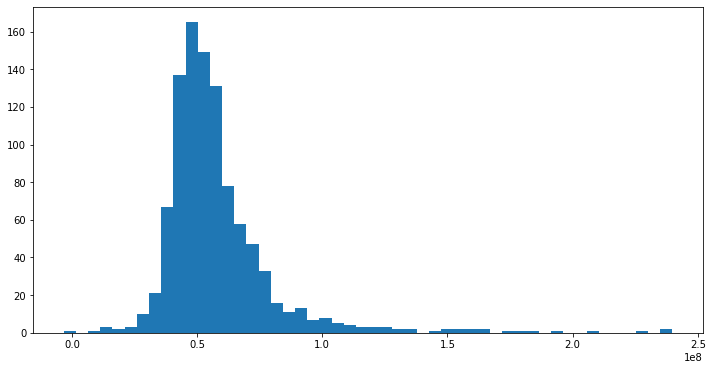

In [81]:
plt.figure(figsize=(12,6))
plt.hist(sim, bins=50);